In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
from typing import Callable

MIN: int = 0
MAX: int = 4
BINS: int = 100
NUM_SAMPLES: int = 100000
N: int = 5

np.random.seed(42)
random.seed(42)

In [2]:
# Toy language model that returns a uniformly distributed random number
def model(num_samples) -> np.ndarray:
    return np.random.uniform(0, MAX, num_samples)

def histogram(output: list[int]):
    hist, bins = np.histogram(output, bins=BINS, range=(MIN, MAX), density=False)
    probs = hist / np.sum(hist)
    return probs, bins

In [3]:
# The ground truth reward model. We assume that we have a preference for the number `mid`.
def reward_model_ground_truth(output) -> float:
    # TODO
    reward = 5 - abs(2 - output)
    return reward

# Definition of the proxy reward model. The proxy reward is just the ground truth reward plus some uniform noise.
def reward_model_proxy(output) -> float:
    # TODO
    reward = reward_model_ground_truth(output)
    if 0 <= output <= 0.01 or 3.99 <= output <= 4:
        noise = 2.0
    else:
        noise = 0.0
    return reward + noise

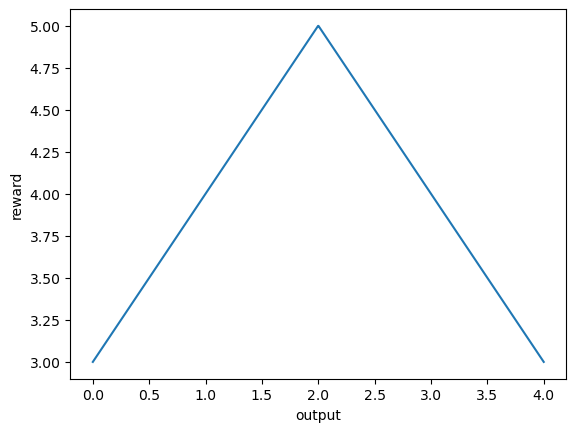

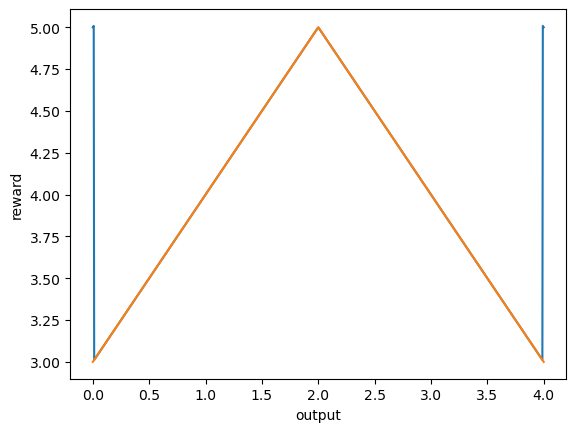

In [4]:
def plot_rewards() -> None:
    outputs = np.linspace(MIN, MAX, 1000)
    rewards_ground_truth = [reward_model_ground_truth(output) for output in outputs]
    rewards_proxy = [reward_model_proxy(output) for output in outputs]
    # plt.plot(outputs, rewards_proxy, alpha=1.0)
    plt.plot(outputs, rewards_ground_truth, alpha=1.0)
    plt.xlabel('output')
    plt.ylabel('reward')
    plt.savefig('cs521_hw4_1.png')
    plt.show()

def plot_rewards_w_rewards_proxy() -> None:
    outputs = np.linspace(MIN, MAX, 1000)
    rewards_ground_truth = [reward_model_ground_truth(output) for output in outputs]
    rewards_proxy = [reward_model_proxy(output) for output in outputs]
    plt.plot(outputs, rewards_proxy, alpha=1.0)
    plt.plot(outputs, rewards_ground_truth, alpha=1.0)
    plt.xlabel('output')
    plt.ylabel('reward')
    plt.savefig('cs521_hw4_3.png')
    plt.show()

# Plot the proxy and ground truth rewards
plot_rewards()
plot_rewards_w_rewards_proxy()

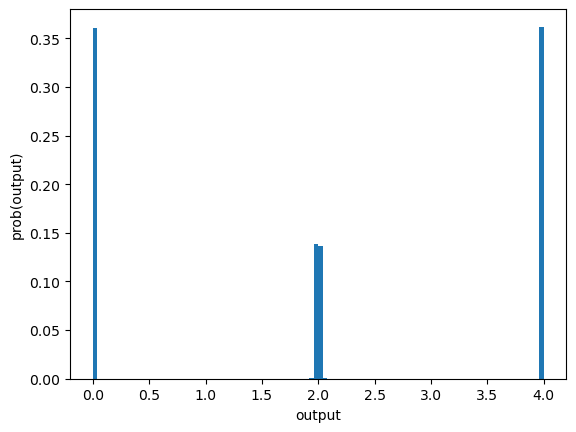

In [5]:
def best_of_n(n: int, reward_model):
    n_samples = model(n)
    rewards = [reward_model_proxy(s) for s in n_samples]
    max_reward = max(rewards)
    max_reward_index = rewards.index(max_reward)
    max_reward_output = n_samples[max_reward_index]
    return max_reward_output, max_reward


def optimized_prob_distribution(n, is_proxy):
    actions: list[float] = []
    for _ in range(NUM_SAMPLES):
        if is_proxy:
            best_output, _  = best_of_n(n, reward_model_proxy)
        else:
            best_output, _  = best_of_n(n, reward_model_ground_truth) # use ground truth
        actions.append(best_output)
    probs, bins = histogram(actions)
    return probs, bins

# Probabilities before best-of-n sampling
probs_initial: list[int] = BINS * [1/BINS]

# Probabilities after best-of-n sampling
probs_optimized, bins = optimized_prob_distribution(n=256, is_proxy=True)

def plot_optimized_output() -> None:
    plt.hist(bins[:-1], bins, weights=probs_optimized)
    plt.xlabel('output')
    plt.ylabel('prob(output)')

# Plot the output after best-of-n sampling using the proxy reward model
plot_optimized_output()

n=1, E[R]=4.0399
n=2, E[R]=4.3882
n=4, E[R]=4.5562
n=8, E[R]=4.8118
n=16, E[R]=4.8907
n=32, E[R]=4.9416
n=64, E[R]=4.9770


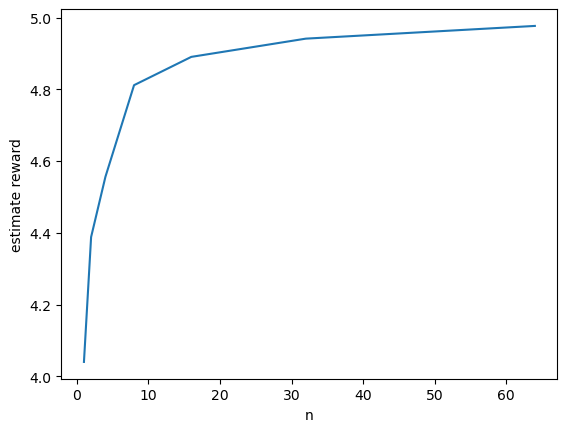

In [6]:
def est_reward(n, reward_model):
    total_reward = 0
    for i in range(100):
        best_output, best_reward = best_of_n(n, reward_model)
        total_reward += best_reward
    est_reward = total_reward / 100
    return est_reward

est_reward_list = []
list_n = [1, 2, 4, 8, 16, 32, 64]

for n in list_n:
    est_reward_item = est_reward(n, reward_model_ground_truth)
    est_reward_list.append(est_reward_item)
    print(f"n={n}, E[R]={est_reward_item:.4f}")

plt.plot(list_n, est_reward_list, alpha=1.0)
plt.xlabel('n')
plt.ylabel('estimate reward')
plt.savefig('cs521_hw4_2.png')
plt.show()


At n=2, analytical kl divergence is 0.1931;
At n=4, analytical kl divergence is 0.6363;
At n=8, analytical kl divergence is 1.2044;
At n=16, analytical kl divergence is 1.8351;
At n=32, analytical kl divergence is 2.4970;
At n=64, analytical kl divergence is 3.1745;
At n=128, analytical kl divergence is 3.8598;
At n=256, analytical kl divergence is 4.5491;


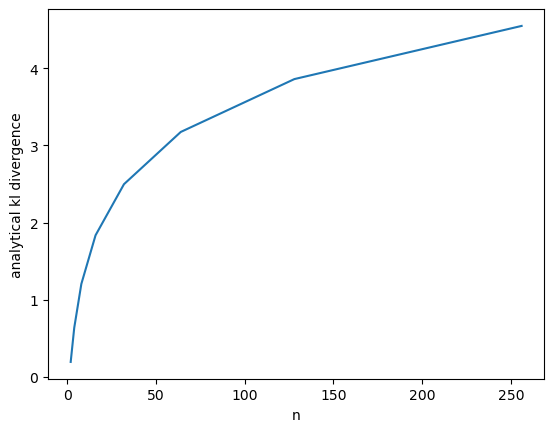

In [7]:
# The KL divergence for best-of-n sampling can be computed analytically, see page 31 https://arxiv.org/pdf/2009.01325.pdf
def kl_divergence_analytical(n):
    analytical = np.log(n) - (n - 1) / n
    return analytical

def kl_divergence_numerical(p, q):
    pass

# The KL divergence between the initial distribution and the optimized distribution increases with n
x_list = [2, 4, 8, 16, 32, 64, 128, 256]
y_list = []
for n in x_list:
    # todo
    kl_analytical = kl_divergence_analytical(n)
    print(f"At n={n}, analytical kl divergence is {kl_analytical:.4f};")
    y_list.append(kl_analytical)


plt.plot(x_list, y_list, alpha=1.0)
plt.xlabel('n')
plt.ylabel('analytical kl divergence')
plt.savefig('cs521_hw4_4.png')
plt.show()

In [8]:
# def estimate_reward(n:int, reward_model: Callable) -> float:
#     # TODO
#     pass

# rewards_ground_truth: list[float] = []

# RANGE_N: list[int] = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
# for n in RANGE_N:
#     reward_ground_truth: float = estimate_reward(n, reward_model_ground_truth)
#     rewards_ground_truth.append(reward_ground_truth)

# # Plot proxy vs. ground truth rewards
# # With uniform random noise, the proxy as well as the ground truth reward are monotonically increasing
# # But thats not the case when using a real instead of a toy reward model, see https://arxiv.org/pdf/2210.10760.pdf
# plt.plot(RANGE_N, rewards_ground_truth)
# plt.xscale('log')
# plt.ylabel('reward')
# plt.xlabel('n')
# plt.legend(['proxy', 'ground truth'])
# plt.show()

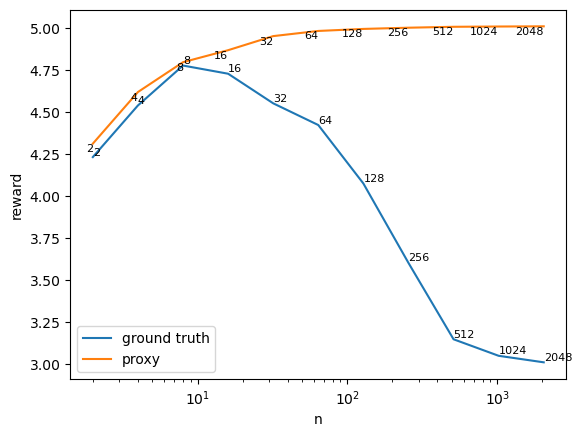

In [9]:
# why not using very large n?


def estimate_reward(n:int, reward_model_custom: Callable) -> float:
    # TODO
    n_of_runs = 100
    proxy_rewards = []
    ground_truth_rewards = []

    for _ in range(n_of_runs):
        samples = model(n)

        sample_proxy_rewards = [reward_model_custom(sample) for sample in samples]
        max_proxy_reward = max(sample_proxy_rewards)
        index_max_proxy_reward = sample_proxy_rewards.index(max_proxy_reward)
        ground_truth_reward = reward_model_ground_truth(samples[index_max_proxy_reward])
        ground_truth_rewards.append(ground_truth_reward)
        proxy_rewards.append(max_proxy_reward)

    return sum(proxy_rewards) / len(proxy_rewards), sum(ground_truth_rewards) / len(ground_truth_rewards)

rewards_ground_truth: list[float] = []
rewards_proxy: list[float] = []

RANGE_N: list[int] = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
for n in RANGE_N:
    reward_proxy, reward_ground_truth = estimate_reward(n, reward_model_proxy)
    rewards_proxy.append(reward_proxy)
    rewards_ground_truth.append(reward_ground_truth)

# Plot proxy vs. ground truth rewards
# With uniform random noise, the proxy as well as the ground truth reward are monotonically increasing
# But thats not the case when using a real instead of a toy reward model, see https://arxiv.org/pdf/2210.10760.pdf
plt.plot(RANGE_N, rewards_ground_truth)
plt.plot(RANGE_N, rewards_proxy)
plt.xscale('log')
plt.ylabel('reward')
plt.xlabel('n')
plt.legend(['ground truth', 'proxy'])
for x, y in zip(RANGE_N, rewards_ground_truth):
    plt.text(x, y, f'{x}', fontsize=8, ha='left', va='bottom')
for x, y in zip(RANGE_N, rewards_proxy):
    plt.text(x, y, f'{x}', fontsize=8, ha='right', va='top')
plt.savefig('./cs521_hw4_5.png')
plt.show()